Modelo guardado como 'modelo_pitagoras.h5'


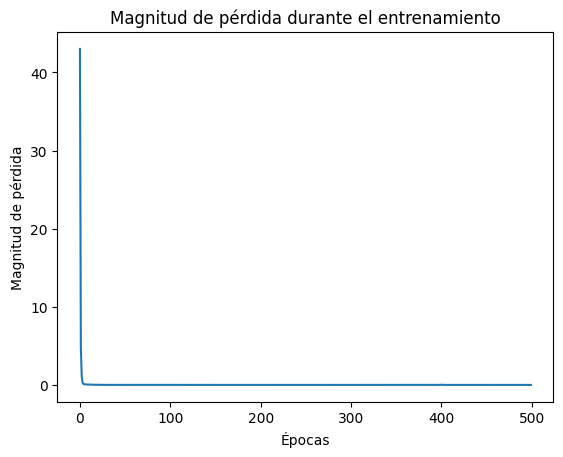

Predicción de la hipotenusa para a=3 y b=4:


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[5.015288]]
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 32976), started 0:45:23 ago. (Use '!kill 32976' to kill it.)

In [8]:
import tensorflow as tf
import numpy as np
import datetime
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Generamos 500 datos de entrenamiento para el Teorema de Pitágoras
a_values = np.random.uniform(1, 10, 500)
b_values = np.random.uniform(1, 10, 500)
c_values = np.sqrt(a_values**2 + b_values**2)  # Hipotenusa calculada

X = np.column_stack((a_values, b_values))  # Catetos 'a' y 'b' como entradas
y = c_values  # Hipotenusa 'c' como salida

# Definimos el modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=8, activation='relu', name='hidden_layer1'),
    tf.keras.layers.Dense(units=8, activation='relu', name='hidden_layer2'),
    tf.keras.layers.Dense(units=1, name='output_layer')
])

# Compilamos el modelo
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Configuramos TensorBoard para capturar activaciones en las capas ocultas
log_dir = "logs/pitagoras/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)

# Entrenamos el modelo y guardamos el historial de pérdidas
history = model.fit(X, y, epochs=500, verbose=0, callbacks=[tensorboard_callback])

# Guardar el modelo entrenado
model.save('modelo_pitagoras.h5')
print("Modelo guardado como 'modelo_pitagoras.h5'")

# Graficamos la magnitud de pérdida
plt.plot(history.history['loss'])
plt.xlabel('Épocas')
plt.ylabel('Magnitud de pérdida')
plt.title('Magnitud de pérdida durante el entrenamiento')
plt.show()

# Predicción de ejemplo
print("Predicción de la hipotenusa para a=3 y b=4:")
print(model.predict(np.array([[3.0, 4.0]])))

# Lanzamos TensorBoard para ver las activaciones en capas ocultas
%load_ext tensorboard
%tensorboard --logdir logs/pitagoras

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input

# Cargar el modelo entrenado
model = load_model('modelo_pitagoras.h5')

# Definir la entrada explícitamente y compilar el modelo
input_data = np.array([[3.0, 4.0]])
model.build(input_shape=(None, 2))

# Función para obtener las activaciones de una capa específica
def get_layer_activation(model, layer_name, input_data):
    # Crear una nueva entrada explícita para el modelo intermedio
    input_layer = Input(shape=(2,))
    intermediate_layer_model = tf.keras.Model(inputs=input_layer, outputs=model.get_layer(layer_name).output)
    # Compilamos y llamamos al modelo intermedio
    intermediate_layer_model.build(input_shape=(None, 2))
    activation = intermediate_layer_model.predict(input_data)
    return activation

# Obtener las activaciones de cada capa oculta
activation_hidden1 = get_layer_activation(model, 'hidden_layer1', input_data)
activation_hidden2 = get_layer_activation(model, 'hidden_layer2', input_data)

# Visualizar las activaciones de la primera capa oculta
plt.figure(figsize=(10, 4))
plt.bar(range(activation_hidden1.shape[1]), activation_hidden1[0], color='lightblue')
plt.xlabel('Neurona')
plt.ylabel('Activación')
plt.title('Activaciones de la Capa Oculta 1 (hidden_layer1)')
plt.show()

# Visualizar las activaciones de la segunda capa oculta
plt.figure(figsize=(10, 4))
plt.bar(range(activation_hidden2.shape[1]), activation_hidden2[0], color='lightgreen')
plt.xlabel('Neurona')
plt.ylabel('Activación')
plt.title('Activaciones de la Capa Oculta 2 (hidden_layer2)')
plt.show()


KeyError: 'Exception encountered when calling Functional.call().\n\n\x1b[1m2165063034272\x1b[0m\n\nArguments received by Functional.call():\n  • inputs=tf.Tensor(shape=(1, 2), dtype=float32)\n  • training=False\n  • mask=None'

In [10]:
import tkinter as tk
from tensorflow.keras.models import load_model
import numpy as np

# Cargar el modelo guardado
model = load_model('modelo_pitagoras.h5')

# Función para calcular la hipotenusa, área y perímetro
def calcular():
    a = float(entry_a.get())
    b = float(entry_b.get())
    resultado = model.predict(np.array([[a, b]]))
    h = resultado[0][0]

    # Cálculos adicionales
    area = 0.5 * a * b
    perimetro = a + b + h

    # Mostrar los resultados
    label_hipotenusa.config(text=f"Hipotenusa (h): {h:.2f}")
    label_area.config(text=f"Área: {area:.2f}")
    label_perimetro.config(text=f"Perímetro: {perimetro:.2f}")

# Crear ventana de Tkinter
ventana = tk.Tk()
ventana.title("Teorema de Pitágoras - Calculadora")

# Configuración de la cuadrícula para que la interfaz sea más ordenada
ventana.columnconfigure([0, 1, 2], weight=1)

# Etiqueta y entrada para el Cateto a
tk.Label(ventana, text="Lado a:").grid(row=0, column=0, padx=10, pady=10, sticky="e")
entry_a = tk.Entry(ventana, width=10)
entry_a.grid(row=0, column=1, pady=10)

# Etiqueta y entrada para el Cateto b
tk.Label(ventana, text="Lado b:").grid(row=1, column=0, padx=10, pady=10, sticky="e")
entry_b = tk.Entry(ventana, width=10)
entry_b.grid(row=1, column=1, pady=10)

# Botón para calcular
boton_calcular = tk.Button(ventana, text="Calcular", command=calcular)
boton_calcular.grid(row=2, column=0, columnspan=2, pady=10)

# Área para mostrar el triángulo y los resultados
canvas = tk.Canvas(ventana, width=200, height=200, bg="white")
canvas.grid(row=0, column=2, rowspan=3, padx=20)

# Dibujar el triángulo en el canvas
canvas.create_polygon(10, 180, 180, 180, 10, 10, outline="black", fill="lightblue", width=2)
canvas.create_text(95, 190, text="Lado a", anchor="n")
canvas.create_text(20, 95, text="Lado b", anchor="w")
canvas.create_text(95, 80, text="Hipotenusa (h)", anchor="s")

# Etiquetas para mostrar los resultados de la hipotenusa, el área y el perímetro
label_hipotenusa = tk.Label(ventana, text="Hipotenusa (h):", font=("Arial", 10, "bold"))
label_hipotenusa.grid(row=3, column=0, columnspan=2, pady=5)

label_area = tk.Label(ventana, text="Área:", font=("Arial", 10, "bold"))
label_area.grid(row=4, column=0, columnspan=2, pady=5)

label_perimetro = tk.Label(ventana, text="Perímetro:", font=("Arial", 10, "bold"))
label_perimetro.grid(row=5, column=0, columnspan=2, pady=5)

# Iniciar la ventana
ventana.mainloop()
